# ***Objetivo:***
### O principal objetivo deste projeto foi construir um modelo preditivo que pudesse identificar a probabilidade de um usuário clicar em anúncios com base em um conjunto de variáveis relacionadas ao perfil do usuário e ao comportamento no site.

## **1º Análise do Problema e Configuração Inicial**

In [ ]:
# Pacotes necessários 
! pip install pandas as pd # manipulação de dados 
! pip install numpy as np# Para operações matemáticas e numéricas
! pip import matplotlib.pyplot as plt # visualização de dados 
! pip import seaborn as sns  # visualização de dados 

In [4]:
# 1º Passo: Ler o DataFrame e salvá-lo em uma variável `click`
click = pd.read_csv('adsclicking.csv')  
click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2000 non-null   int64  
 1   Age                     2000 non-null   int64  
 2   Gender                  2000 non-null   object 
 3   Income                  2000 non-null   int64  
 4   Location                2000 non-null   object 
 5   Device                  2000 non-null   object 
 6   Interest_Category       2000 non-null   object 
 7   Time_Spent_on_Site      2000 non-null   float64
 8   Number_of_Pages_Viewed  2000 non-null   int64  
 9   Click                   2000 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [14]:
# 2º Passo: Exploração Inicial do Dataset
print("Exploração Inicial do Dataset")
print(f"Número de entradas: {click.shape[0]}")
print(f"Número de variáveis: {click.shape[1]}")
print("\nTipos de variáveis:")
print(click.dtypes)
print("\nValores ausentes:")
print(click.isnull().sum())

Exploração Inicial do Dataset
Número de entradas: 2000
Número de variáveis: 10

Tipos de variáveis:
Unnamed: 0                  int64
Age                         int64
Gender                     object
Income                      int64
Location                   object
Device                     object
Interest_Category          object
Time_Spent_on_Site        float64
Number_of_Pages_Viewed      int64
Click                       int64
dtype: object

Valores ausentes:
Unnamed: 0                0
Age                       0
Gender                    0
Income                    0
Location                  0
Device                    0
Interest_Category         0
Time_Spent_on_Site        0
Number_of_Pages_Viewed    0
Click                     0
dtype: int64


In [21]:
# 3º passo: Análise Exploratória Básica 
# Criar histogramas para viriáveis numéricas 
print("\nAnálise Exploratória Básica")
click_vars_num = click.select_dtypes(include=['int64', 'float64']).columns
print("Variáveis númericas", click_vars_num)

for col in click_vars_num:
    plt.figure(figsize=(8, 5))
    sns.histplot(click[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()


Análise Exploratória Básica
Variáveis númericas Index(['Unnamed: 0', 'Age', 'Income', 'Time_Spent_on_Site',
       'Number_of_Pages_Viewed', 'Click'],
      dtype='object')


/var/folders/xw/dp2yhxfs4ql6scnjxpfv_qmr0000gn/T/ipykernel_13378/2866133193.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/xw/dp2yhxfs4ql6scnjxpfv_qmr0000gn/T/ipykernel_13378/2866133193.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/xw/dp2yhxfs4ql6scnjxpfv_qmr0000gn/T/ipykernel_13378/2866133193.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/xw/dp2yhxfs4ql6scnjxpfv_qmr0000gn/T/ipykernel_13378/2866133193.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/xw/dp2yhxfs4ql6scnjxpfv_qmr0000gn/T/ipykernel_13378/2866133193.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/xw/dp2yhxfs4ql6scnjxpfv_qmr0000gn/T/ipykernel_13378/2866133193.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be

In [22]:
# 4º passo: Contagens para variáveis categóricas
click_vars_categs = click.select_dtypes(include=['object', 'category']).columns
print("Variáveis categóricas:", click_vars_categs)

for col in click_vars_categs:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=click, x=col)
    plt.title(f'Contagem de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.show()

Variáveis categóricas: Index(['Gender', 'Location', 'Device', 'Interest_Category'], dtype='object')


/var/folders/xw/dp2yhxfs4ql6scnjxpfv_qmr0000gn/T/ipykernel_13378/2024142146.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/xw/dp2yhxfs4ql6scnjxpfv_qmr0000gn/T/ipykernel_13378/2024142146.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/xw/dp2yhxfs4ql6scnjxpfv_qmr0000gn/T/ipykernel_13378/2024142146.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()
/var/folders/xw/dp2yhxfs4ql6scnjxpfv_qmr0000gn/T/ipykernel_13378/2024142146.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [24]:
# 5º passo: Distribuição da variável alvo (Clicked)

if 'Click' in click.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=click, x='Click')
    plt.title('Distribuição da variável alvo (Click)')
    plt.xlabel('Click')
    plt.ylabel('Frequência')
    plt.show()
else:
    print("A variável 'click' não foi encontrada no dataset.")

/var/folders/xw/dp2yhxfs4ql6scnjxpfv_qmr0000gn/T/ipykernel_13378/1937752399.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


## **2º Pré-Processamento e Engenharia de Dados**

In [ ]:
# Instalar e importar os pacotes necessários
! pip install pandas 
! pip install numpy 
! pip install scikit-learn 
! pip install matplotlib 
! pip install seaborn

# Importar as bibliotecas com apelidos
import pandas as pd # Manipulação de DataFrame
import numpy as np # Operações numéricas
from sklearn.model_selection import train_test_split # Divisão em treino/teste
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Normalização e codificação
import matplotlib.pyplot as plt # Visualização de dados
import seaborn as sns # Gráficos avançados


--- Passo 1: Tratamento de Dados Ausentes ---

In [26]:
# Verificar valores ausentes no dataset
print("Valores ausentes antes do tratamento:")
print(click.isnull().sum()) # Exibe a soma dos valores ausentes para cada coluna

Valores ausentes antes do tratamento:
Unnamed: 0                0
Age                       0
Gender                    0
Income                    0
Location                  0
Device                    0
Interest_Category         0
Time_Spent_on_Site        0
Number_of_Pages_Viewed    0
Click                     0
dtype: int64


--- Passo 2: Codificação de Variáveis Categóricas ---

In [27]:
# Identificar as colunas categóricas no dataset
categorical_vars = click.select_dtypes(include=['object', 'category']).columns
print("\nVariáveis categóricas identificadas:", categorical_vars)


Variáveis categóricas identificadas: Index(['Gender', 'Location', 'Device', 'Interest_Category'], dtype='object')


In [28]:
# Aplicar One-Hot Encoding para transformar variáveis categóricas
click_encoded = pd.get_dummies(click, columns=categorical_vars, drop_first=True) 
# drop_first=True remove uma categoria de referência para evitar multicolinearidade

# Exibir o número de colunas após a codificação
print("\nNúmero de colunas após One-Hot Encoding:", click_encoded.shape[1])


Número de colunas após One-Hot Encoding: 14


--- Passo 3: Normalização ou Padronização ---

In [30]:
# Identificar variáveis numéricas para normalização
numerical_vars = click_encoded.select_dtypes(include=['float64', 'int64']).columns


In [31]:
# Usar StandardScaler para padronizar as variáveis numéricas
scaler = StandardScaler() # Inicializa o escalador
click_encoded[numerical_vars] = scaler.fit_transform(click_encoded[numerical_vars])
# Substitui os valores das colunas numéricas pelos padronizados

In [32]:
# Exibir uma amostra do dataset após a normalização
print("\nPrimeiras linhas do dataset após normalização:")
print(click_encoded.head())


Primeiras linhas do dataset após normalização:
   Unnamed: 0       Age    Income  Time_Spent_on_Site  Number_of_Pages_Viewed  \
0   -1.731185  1.090713  1.706073            0.641820               -0.606651   
1   -1.729453  0.347898  0.552447           -0.038733               -1.337227   
2   -1.727721 -0.692044  0.004553            0.545933               -1.519870   
3   -1.725989  1.387839  0.635562           -1.590299               -0.789295   
4   -1.724257 -1.212015  1.258072            0.472309               -0.241364   

      Click  Gender_Male  Location_Suburban  Location_Urban  Device_Mobile  \
0 -0.994018         True              False           False           True   
1  1.006018         True               True           False          False   
2 -0.994018         True               True           False          False   
3 -0.994018         True              False            True          False   
4 -0.994018        False               True           False           True 

--- Passo 4: Divisão dos Dados ---

In [33]:
X = click_encoded.drop('Click', axis=1) # X contém todas as colunas exceto a variável alvo
y = click_encoded['Click'] # y contém apenas a variável alvo

In [34]:
# Dividir o dataset em conjuntos de treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Exibir os tamanhos dos conjuntos de dados
print("\nTamanhos dos conjuntos de dados:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}") # Tamanhos do conjunto de treino e teste
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}") # Tamanhos do conjunto de treino e teste

# O dataset agora está pronto para ser usado em um modelo de Machine Learning.


Tamanhos dos conjuntos de dados:
X_train: (1600, 13), X_test: (400, 13)
y_train: (1600,), y_test: (400,)


## **3º Treinamento e Avaliação Inicial do Modelo**

--- Passo 1: Treinamento do Modelo de Regressão Logística ---

In [49]:
# Importar o modelo de regressão logística
from sklearn.linear_model import LogisticRegression 


In [53]:
# Converter os rótulos contínuos para binários 
y_train = np.where(y_train > 0, 1, 0)
y_test = np.where(y_test > 0, 1, 0)

In [54]:
# Inicializar o modelo de Regressão Logística
model = LogisticRegression(random_state=42)

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

print("\nModelo de Regressão Logística treinado com sucesso!")



Modelo de Regressão Logística treinado com sucesso!


--- Passo 2: Avaliação de Desempenho ---

In [55]:
# `classification_report` gera um relatório de desempenho com métricas como precisão, recall e F1-score.
from sklearn.metrics import classification_report

# `roc_auc_score` calcula a área sob a curva ROC (Receiver Operating Characteristic), útil para avaliar classificadores binários.
from sklearn.metrics import roc_auc_score

# `confusion_matrix` cria a matriz de confusão, mostrando os valores reais versus os valores previstos em uma tabela.
from sklearn.metrics import confusion_matrix

# `roc_curve` calcula os valores da curva ROC (taxa de verdadeiros positivos e taxa de falsos positivos para diferentes limiares).
from sklearn.metrics import roc_curve


In [56]:
# Fazer previsões nos dados de teste
y_pred = model.predict(X_test) # Previsões finais (classes: 0 ou 1)
y_prob = model.predict_proba(X_test)[:, 1] # Probabilidades de pertencer à classe 1

# Exibir as métricas de avaliação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred)) # Inclui precisão, recall e F1-Score

# Calcular e exibir o ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("\nROC AUC Score:", roc_auc)


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.46      0.47      0.46       198
           1       0.46      0.45      0.46       202

    accuracy                           0.46       400
   macro avg       0.46      0.46      0.46       400
weighted avg       0.46      0.46      0.46       400


ROC AUC Score: 0.4480948094809481


--- Passo 3: Visualização dos Resultados ---

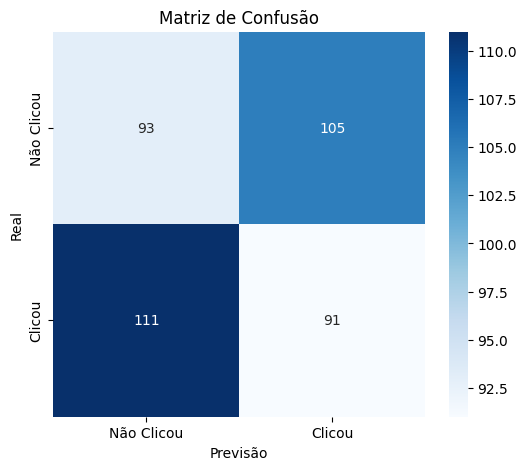

In [60]:
# Gerar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão como um heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Clicou", "Clicou"], yticklabels=["Não Clicou", "Clicou"])
plt.title("Matriz de Confusão")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.show()

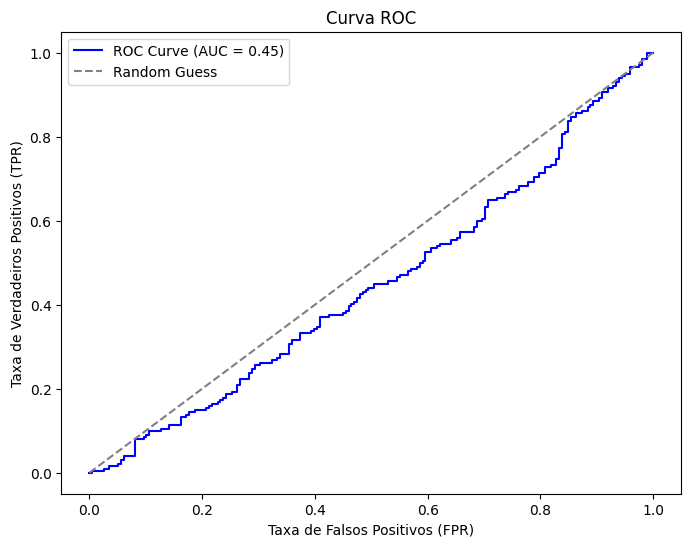

In [61]:
# Visualização da Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.show()

In [62]:
print("\nO modelo foi avaliado e os resultados foram visualizados com sucesso!")



O modelo foi avaliado e os resultados foram visualizados com sucesso!


## **4º Interpretação e Ajustes no Modelo**

 --- Passo 1: Análise de Coeficientes ---

In [63]:
# Coeficientes do modelo treinado
coef = pd.DataFrame({
    'Variable': X_train.columns, # Nomes das variáveis independentes
    'Coefficient': model.coef_[0] # Coeficientes calculados pelo modelo
}).sort_values(by='Coefficient', ascending=False) # Ordenar por impacto

print("\nAnálise de Coeficientes do Modelo:")
print(coef)


Análise de Coeficientes do Modelo:
                        Variable  Coefficient
5                    Gender_Male     0.055408
3             Time_Spent_on_Site     0.036314
12      Interest_Category_Travel     0.034137
0                     Unnamed: 0    -0.000301
4         Number_of_Pages_Viewed    -0.001892
1                            Age    -0.009984
6              Location_Suburban    -0.016911
2                         Income    -0.027068
11  Interest_Category_Technology    -0.041882
8                  Device_Mobile    -0.064200
9                  Device_Tablet    -0.104805
10      Interest_Category_Sports    -0.162212
7                 Location_Urban    -0.220413


/var/folders/xw/dp2yhxfs4ql6scnjxpfv_qmr0000gn/T/ipykernel_13378/3828144783.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Variable', data=coef, palette='viridis')


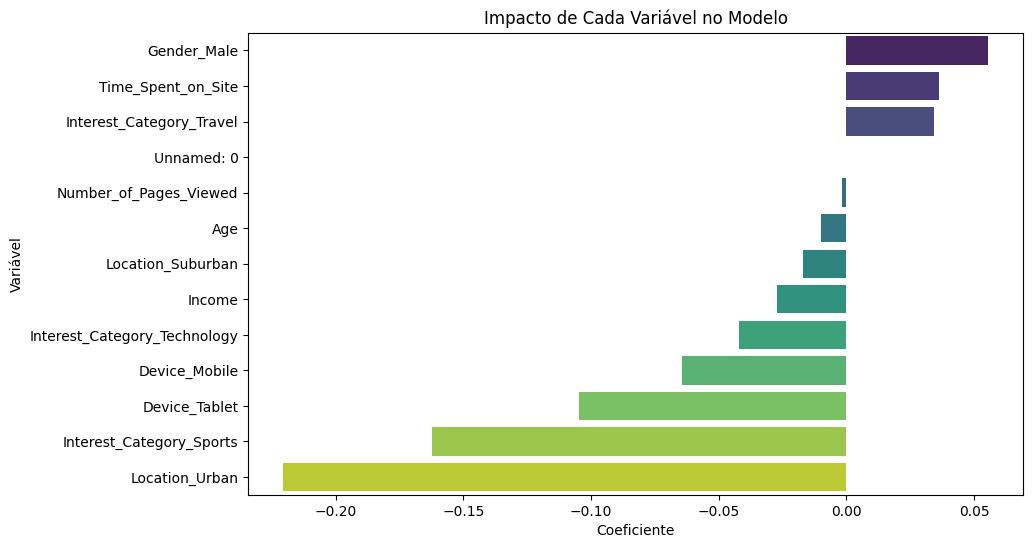

In [64]:
# Visualizar os coeficientes em um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coef, palette='viridis')
plt.title("Impacto de Cada Variável no Modelo")
plt.xlabel("Coeficiente")
plt.ylabel("Variável")
plt.show()

 --- Passo 2: Ajuste de Hiperparâmetros ---

In [65]:
# `GridSearchCV` é usado para realizar a busca em grade (Grid Search) para encontrar os melhores
# hiperparâmetros de um modelo. Ele testa combinações de valores de hiperparâmetros definidos pelo
# usuário para encontrar a configuração que maximiza o desempenho do modelo.
from sklearn.model_selection import GridSearchCV

In [66]:
# Definir a grade de parâmetros para buscar o melhor valor de C
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Inicializar o GridSearchCV com validação cruzada de 5 folds
grid = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc')

# Ajustar o GridSearchCV nos dados de treino
grid.fit(X_train, y_train)

# Exibir os melhores parâmetros encontrados
print("\nMelhores Parâmetros Encontrados:")
print(grid.best_params_)


Melhores Parâmetros Encontrados:
{'C': 10}


--- Passo 3: Treine o Modelo Ajustado ---


In [67]:
# Inicializar um novo modelo de Regressão Logística com os melhores parâmetros
best_model = LogisticRegression(C=grid.best_params_['C'], random_state=42)

# Treinar o modelo com os melhores parâmetros
best_model.fit(X_train, y_train)

# Avaliar o desempenho do modelo ajustado
y_pred_best = best_model.predict(X_test) # Previsões
y_prob_best = best_model.predict_proba(X_test)[:, 1] # Probabilidades para classe positiva

# Relatório de classificação e ROC AUC
print("\nRelatório de Classificação do Modelo Ajustado:")
print(classification_report(y_test, y_pred_best))
roc_auc_best = roc_auc_score(y_test, y_prob_best)
print("\nROC AUC do Modelo Ajustado:", roc_auc_best)


Relatório de Classificação do Modelo Ajustado:
              precision    recall  f1-score   support

           0       0.46      0.47      0.46       198
           1       0.46      0.45      0.46       202

    accuracy                           0.46       400
   macro avg       0.46      0.46      0.46       400
weighted avg       0.46      0.46      0.46       400


ROC AUC do Modelo Ajustado: 0.4473447344734474


3º --- Visualização dos Resultados do Modelo Ajustado ---

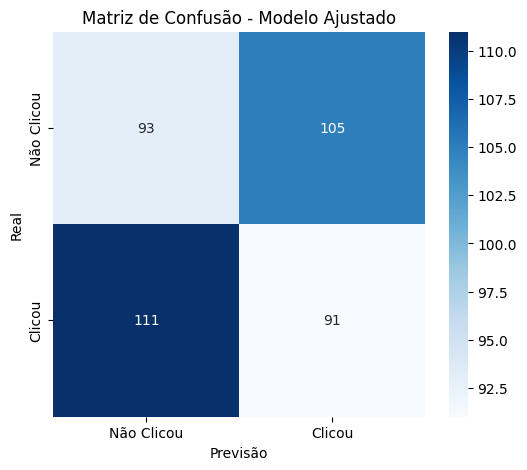

In [68]:
# Matriz de Confusão do Modelo Ajustado
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Clicou", "Clicou"], yticklabels=["Não Clicou", "Clicou"])
plt.title("Matriz de Confusão - Modelo Ajustado")
plt.xlabel("Previsão")
plt.ylabel("Real")
plt.show()


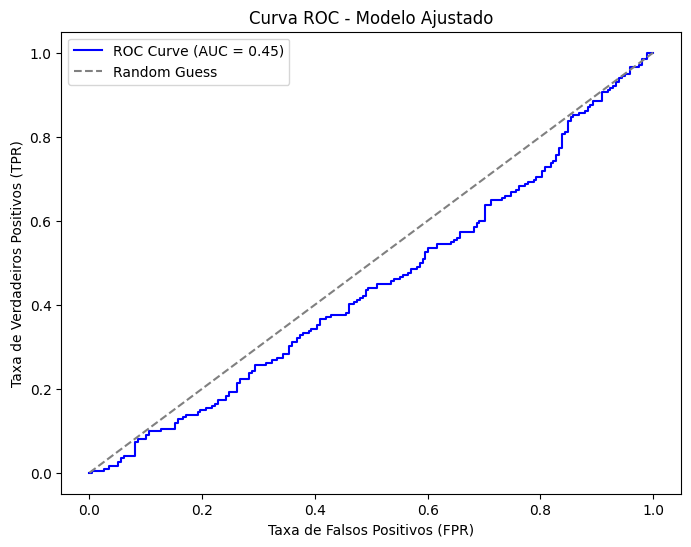


Modelo otimizado avaliado com sucesso!


In [69]:
# Curva ROC do Modelo Ajustado
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_prob_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, color='blue', label=f'ROC Curve (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Modelo Ajustado")
plt.legend()
plt.show()

print("\nModelo otimizado avaliado com sucesso!")

## **5º Conclução**


### Avaliação do Modelo: O modelo ajustado apresentou os seguintes resultados no conjunto de teste:
Precisão: 46%

Recall: 46%

F1-Score: 46%

AUC (Curva ROC): 0,45

A matriz de confusão mostrou dificuldade do modelo em distinguir entre as classes "Cliques" e "Não Cliques", o que indica uma performance limitada.

### Interpretação:
A análise dos coeficientes mostrou que algumas variáveis, como "Tempo no site" e "Interesse por viagens", tiveram maior impacto no modelo.

### A variável categórica "Interesse por Esportes" teve um impacto negativo, indicando que usuários com essa característica tinham menor probabilidade de clicar nos anúncios.

## Conclusão Final
Apesar do desempenho limitado, este projeto proporcionou uma análise detalhada do processo de modelagem preditiva. As etapas realizadas forneceram insights úteis sobre o comportamento do modelo e das variáveis, além de destacar oportunidades para melhorias futuras. A criação de um pipeline de machine learning reproduzível também garante a escalabilidade e aplicabilidade em contextos reais.